In [6]:
# read data and import packages

import math
import numpy as np
from scipy import linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

raw_matrix = numpy.loadtxt(open("/Users/macbookpro/Desktop/IE 529 HW3/Data-HW3/PCAdata.csv", "rb"), delimiter=",")

In [5]:
#perform SVD on original matrix

U,S,V = linalg.svd(raw_matrix)

In [13]:
#perform matrix scaling and center the data in oringinal matrix
n = 200
centered_matrix = (raw_matrix - raw_matrix.mean(axis=1)[:, None])/ math.sqrt(n - 1)
cov = np.dot(centered_matrix, centered_matrix.T)

#calculate the eigenvalue and eigenvectors
e, v = np.linalg.eig(cov)

#sort the eigenvalues
sorted_e = sorted(e , reverse = True)

vT = v[:,[0,2]]

print (sorted_e)
print (e)
print (v)
print(vT)

[[ 0.66943821  0.22771139]
 [ 0.32203254 -0.9467286 ]
 [ 0.66943821  0.22771139]]
[2.3829744914056272, 0.23466776481580504, 7.1043968626113282e-17]
[  2.38297449e+00   7.10439686e-17   2.34667765e-01]
[[  6.69438214e-01   7.07106781e-01   2.27711392e-01]
 [  3.22032538e-01   5.40520479e-16  -9.46728601e-01]
 [  6.69438214e-01  -7.07106781e-01   2.27711392e-01]]


In [11]:
renew_data= np.dot(vT.T, centered_matrix)
print(renew_data)

[[ -1.48883676e-01  -1.01591685e-01  -4.89669133e-02  -1.53447482e-01
   -1.92176620e-01  -1.51254286e-01  -8.55679611e-02  -7.24621513e-02
   -8.33180676e-02  -1.15239006e-01  -7.47009822e-02  -1.16565833e-01
   -5.36900250e-02  -1.48188761e-01  -6.55905856e-02  -1.30247568e-01
   -9.55914016e-02  -5.71234454e-02  -4.19264761e-02  -1.54887272e-01
   -4.15845085e-02  -4.90316846e-02  -1.15587637e-01  -1.03512955e-01
   -1.26540238e-01  -9.67062443e-02  -8.30413808e-02  -9.15261532e-02
   -5.55801259e-02  -4.98841910e-02  -6.51740725e-02  -1.28946615e-01
   -9.07731440e-02  -8.43626303e-02  -1.53663125e-01  -4.42292880e-02
   -7.16734325e-02  -7.77625621e-02  -7.74096271e-02  -7.64352488e-02
   -1.37499432e-01  -9.22453570e-02  -9.47806040e-02  -1.08969066e-01
   -1.56463733e-02  -1.37207201e-01  -1.05426169e-01  -1.51997380e-01
   -1.55451769e-01  -1.17595155e-01  -1.11342905e-01  -1.39598640e-02
   -9.63610580e-02  -1.56057016e-01  -2.32566078e-02  -3.38176094e-02
   -1.08197555e-01  

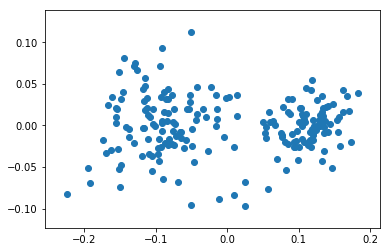

In [15]:
# plot 1
X1 = renew_data[0]
X2 = renew_data[1]

plt.scatter(X1, X2)
plt.show()

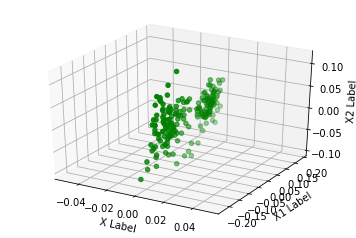

In [21]:
#plot 2
plot = plt.figure()
ax = plot.add_subplot(111, projection='3d')

x = np.zeros(200)
y = X1
z = X2

ax.scatter(x, y, z, c='g', marker='o', label = 'PCA dibased', )

ax.set_xlabel('X Label')
ax.set_ylabel(' X1 Label')
ax.set_zlabel('X2 Label')

plt.show()

In [27]:
# perform SVD on scaled matrix

reconstruct_matrix = centered_matrix
U1, S1, V1 = linalg.svd(reconstruct_matrix)
Ans = np.dot(U1.T, reconstruct_matrix)
print (Ans)

[[  1.48883676e-01   1.01591685e-01   4.89669133e-02   1.53447482e-01
    1.92176620e-01   1.51254286e-01   8.55679611e-02   7.24621513e-02
    8.33180676e-02   1.15239006e-01   7.47009822e-02   1.16565833e-01
    5.36900250e-02   1.48188761e-01   6.55905856e-02   1.30247568e-01
    9.55914016e-02   5.71234454e-02   4.19264761e-02   1.54887272e-01
    4.15845085e-02   4.90316846e-02   1.15587637e-01   1.03512955e-01
    1.26540238e-01   9.67062443e-02   8.30413808e-02   9.15261532e-02
    5.55801259e-02   4.98841910e-02   6.51740725e-02   1.28946615e-01
    9.07731440e-02   8.43626303e-02   1.53663125e-01   4.42292880e-02
    7.16734325e-02   7.77625621e-02   7.74096271e-02   7.64352488e-02
    1.37499432e-01   9.22453570e-02   9.47806040e-02   1.08969066e-01
    1.56463733e-02   1.37207201e-01   1.05426169e-01   1.51997380e-01
    1.55451769e-01   1.17595155e-01   1.11342905e-01   1.39598640e-02
    9.63610580e-02   1.56057016e-01   2.32566078e-02   3.38176094e-02
    1.08197555e-01  